In [1]:
from sagas.zh.ltp_procs import ltp
from sagas.nlu.uni_impl_ltp import get_pos_mapping

sents='国务院总理李克强调研上海外高桥时提出，支持上海积极探索新机制。'
words, postags, arcs, roles, netags=ltp.parse(sents)

def get_feats(i):    
    # return [postags[i], get_pos_mapping(postags[i])]
    pos_tr=get_pos_mapping(postags[i])
    return ['c_{}'.format(pos_tr).lower(), 
            'x_{}'.format(postags[i]).lower()]

get_feats(10)

ModuleNotFoundError: No module named 'pyltp'

In [11]:
from sagas.zh.ltp_procs import join_words
import sagas

def word_chunk(words, arg_range):
    return [str(words[idx]) for idx in range(arg_range.start, arg_range.end+1)]

def extract_predicates(words, roles, verbose=False):
    predicts = []
    predict_tuples=[]
    for role in roles:
        if verbose:
            print(f"{words[role.index]}({role.index})", '->', "".join(
                ["%s:(%d,%d) _ " % (arg.name, arg.range.start, arg.range.end) for arg in role.arguments]))
        args = []
        domains=[]
        for arg in role.arguments:
            # print('\t', arg.name, arg.range.start, arg.range.end)
            chunk = word_chunk(words, arg.range)
            main_word=words[arg.range.end]
            if verbose:
                print('\t', arg.name, '☞', cnt)
            # print('\t', '----')
            args.append({'name': arg.name, 'chunk': chunk, 'value': str(main_word),
                         'start': arg.range.start, 'end': arg.range.end})
            # ['rel', 'index', 'text', 'lemma', 'children', 'features']
            feats=get_feats(arg.range.end)
            domains.append((arg.name, arg.range.end, str(main_word), str(main_word),
                           chunk, feats))
        lemma=words[role.index]
        predicts.append({'index': role.index, 'predicate': lemma,
                         'args': args})
        i=role.index
        dependency_relation=str(arcs[i].relation).lower()
        governor=arcs[i].head
        predict_tuples.append({'type':'predicate', 'lemma':lemma, 'index': i,
                              'rel': dependency_relation, 'governor': governor,
                              'domains': domains, 'stems':[]})
    return predicts, predict_tuples

predicts, predict_tuples=extract_predicates(words, roles, verbose=False)
# print(predicts)
for pr in predicts:
    # print(pr)
    print(f"{pr['index']}. {pr['predicate']}")
    cols=pr['args'][0].keys()
    rows=[row.values() for row in pr['args']]
    display(sagas.to_df(rows, cols))

for t in predict_tuples:
    print(t)

7. 提出


,name,chunk,value,start,end
0,TMP,"[国务院, 总理, 李克强, 调研, 上海, 外高桥, 时]",时,0,6
1,A1,"[支持, 上海, 积极, 探索, 新, 机制]",机制,9,14


9. 支持


,name,chunk,value,start,end
0,A1,[上海],上海,10,10


{'type': 'predicate', 'lemma': '提出', 'index': 7, 'rel': 'hed', 'governor': 0, 'domains': [('TMP', 6, '时', '时', ['国务院', '总理', '李克强', '调研', '上海', '外高桥', '时'], ['c_noun', 'x_n']), ('A1', 14, '机制', '机制', ['支持', '上海', '积极', '探索', '新', '机制'], ['c_noun', 'x_n'])], 'stems': []}
{'type': 'predicate', 'lemma': '支持', 'index': 9, 'rel': 'coo', 'governor': 8, 'domains': [('A1', 10, '上海', '上海', ['上海'], ['c_noun', 'x_ns'])], 'stems': []}


```
['rel', 'index', 'text', 'lemma', 'children', 'features']
```
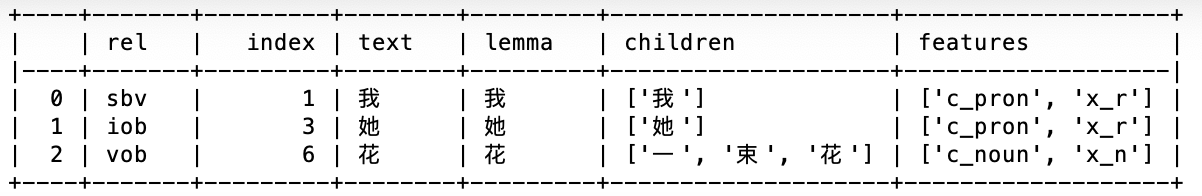

```
rs.append({'type':'verb_domains', 'verb': word.text, 
    'lemma':word.lemma, 'index': word.index,
    'rel': word.dependency_relation, 'governor': word.governor,
    'domains': domains, 'stems':stems})
```
